# Project 1: SAT & ACT Analysis

## Project Overview

This project explore SAT 2017/2018 and ACT 2017/2018 datasets. Objective is to gain insights for recommendations on how to improve the participation rate for SAT. Generally, it was believed that students will tend to choose the test that they have higher confidence to score. Hence this project will study intensively on the relationship of participation rate compared to scores. 

This project demostrates:

- basic statistics (distributions, confidence intervals, hypothesis testing)
- many Python programming concepts
- programmatically interacting with files and directories
- visualizations
- EDA
- working with Jupyter notebooks for development and reporting

However, further analysis and outside research done on states that showed drastic particpation rate improvement from 2017 to 2018, helped us understand state mandatory test implementation is most effective to increase participation rate. Coupling with other recommendations such as improving SAT affordability, accesibility, test structure, offer testing preparation material, we hope this project can help College Board stakeholders to improve SAT participation rate.


## Problem Statement

Since 1926, SAT is the most well known standardized test in US. Over the past decade, ACT has been gaining substantial popularity. In 2012, its number of test participants exceeds SAT. Practically, all American college will accept the scores of either test for admission considerations and awarding merit-based scholarships. It is important to study the statistical relationship of SAT, ACT and its scores, to gain insights for recommendations to improve SAT participation rate.

## Executive Summary

For this project, we will focus on 2017 and 2018 datasets.

Key highlights:
- It was observed that participation rate is inversely proportional to their respective scores
- SAT participation rate median is 14% higher in 2018 as compared to 2017
- In 2018, ACT participation rate median is 14% higher than SAT

Research Findings
- Certain states, example Colorado and Illionis, show drastic participation rate improvement to 100% in 2018 due to:
Statewide mandatory implementation and state covered cost of SAT for all their public students. 


Appropriate Recommendations
- Convince respective states to adopt SAT test as a statewide mandatory test.
- Improving SAT test by improving test structure, affordability, accessibility and awareness


If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline
plt.style.use('seaborn')

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# read the file using pd.read_csv
sat2017 = pd.read_csv('../data/sat_2017.csv')
sat2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [3]:
# read the file using pd.read_csv
act2017 = pd.read_csv('../data/act_2017.csv')
act2017

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
# print first 10 lines of SAT 2017
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
# print first 10 lines of ACT 2017
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: Both SAT 2017 and ACT 2017 are dataframes, showing participation rate, average individual subject scores and average total score for each state. SAT does not test for science and combine reading and writing into one score, whereas ACT tests for science and had separate columns for English reading and writing. 

Total score in SAT is the sum of math and evidence-Based Reading and Writing.
Whereas composite score for ACT is the mean of all subjects combined.

Lower particpation rate for SAT tend to co-relate to a higher scoring. For certain states with 100% participation rate, either for SAT or ACT, percentage of students taking both exams can be obtained from the the other test that was less than 100% particpated.


#### 4a. Does the data look complete? 

Answer: Complete yet still need to be cleaned. ACT had an additional row of National average but not SAT

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: For each ACT section and the overall composite score, scoring scale is between 1 and 36. 
SAT on the other hand is scored on a scale of 400-1600 for total score and 200-800 for each of the 2 subjects. Maryland state has a Maths SAT score of 52, which is below the minimum possible score. Likewise, its science ACT score is also way low, even it had met the minimum possible value.

In [6]:
# use .describe() and .loc() to show only max and min values
sat2017.describe().loc[['min', 'max']]
# Math minimum out of range

,Evidence-Based Reading and Writing,Math,Total
min,482.0,52.0,950.0
max,644.0,651.0,1295.0


In [7]:
sat2017[sat2017['Math'] < 200]
# Maryland is the only state with less than minimum scale range of 200 for SAT

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [8]:
# use .describe() and .loc() to show only max and min values
act2017.describe().loc[['min', 'max']]   
# data for composite missing due to a state contains non-numeric '20.2x' composite

,English,Math,Reading,Science
min,16.3,18.0,18.1,2.3
max,25.5,25.3,26.0,24.9


In [9]:
act2017[act2017['Science'] < 5]
# Maryland observed extremely low science score for ACT 2017. Scale is 1 to 36

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [10]:
sat2017['Math'].replace({52: 524}, inplace=True)
sat2017[sat2017['State']=='Maryland']
# Math value corrected to 524

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [11]:
act2017['Science'].replace({2.3: 23.2}, inplace=True)
act2017[act2017['State']=='Maryland']
# Science value corrected to 23.2

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
# I find the datatype using .info(). Alternatively, .dtypes() can be used
sat2017.info()
# There is no NaN data observed for SAT 2017
# The data type for Participation is incorrect. Should be a float rather than a str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [13]:
# I find the datatype using .info(). Alternatively, .dtypes() can be used
act2017.info()
# There is no NaN data observed for ACT 2017
# The data type for Participation is incorrect. Should be a float rather than a str
# Datatype is composite should also be a float
# There is an extra row than SAT 2017. It should be 50 states, hence 51 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation, Composite were 'object' data types, but they do not contain strings  
Participation for both datasets should be float (% needs to be removed). Composite in ACT dataframe should be in float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:
def to_float(val):
    try:
        new_val = float(val.replace("%",""))
    except:
        new_val = float(val)
    return new_val

In [15]:
# .apply()
sat2017['Participation'] = sat2017['Participation'].apply(to_float)
act2017['Participation'] = act2017['Participation'].apply(to_float)
# by converting Composite to will will throw an error due to Wyoming ValueError: could not convert string to float: '20.2x'
# There is a letter that is preventing the conversion

In [16]:
sat2017.dtypes
# particpation is converted to float sucessfully in SAT 2017

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [17]:
act2017.dtypes
# particpation is converted to float sucessfully in ACT 2017

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

Composite cannot be converted to float due an error for Wyoming. ValueError: could not convert string to float: '20.2x'

This is most likely to be a typo hence the 'x' alphabet shall be removed

Since its just a single value, I will manually replace it using .replace(). If multiple values having this error consider using df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'], errors='coerce').
By setting errors=’coerce’, you’ll transform the non-numeric values into NaN.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:
def to_float(val):
    try:
        new_val = float(val.replace("x",""))
    except:
        new_val = float(val)
    return new_val

act2017['Composite'] = act2017['Composite'].apply(to_float)

- Display the data types again to confirm they are correct.

In [19]:
act2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [20]:
# change column names to all lowercase by apply .str.lower()
sat2017.columns = sat2017.columns.str.lower()
act2017.columns = act2017.columns.str.lower()

In [21]:
# remove spaces using rename() and inplace=true
# make column names unique and informative according to year
sat2017.rename(columns={'state':'state', 'participation':'sat_participation_17', 'evidence-based reading and writing':'sat_evidence_based_reading_writing_17', 'math':'sat_math_17', 'total':'sat_total_17'}, inplace=True)
act2017.rename(columns={'state':'state', 'participation': 'act_participation_17', 'english':'act_english_17', 'math':'act_math_17', 'reading':'act_reading_17', 'science':'act_science_17', 'composite':'act_composite_17'}, inplace=True)

In [22]:
# print sat2017 to confirm changes
sat2017.head(3)

,state,sat_participation_17,sat_evidence_based_reading_writing_17,sat_math_17,sat_total_17
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116


In [23]:
# print act2017 to confirm changes
act2017.head(3)

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|       DATA DICTIONARY (METADATA)      	|         	|         	|      	|                    	|             	|       	|                                                                                                                                                                                                                        	|
|:-------------------------------------:	|:-------:	|:-------:	|:----:	|:------------------:	|:-----------:	|:-----:	|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:	|
| Feature                               	|   Type  	| Dataset 	| Year 	| Data Description   	|    Scale    	| Level 	| Feature   Description                                                                                                                                                                                                  	|
| state                                 	|  object 	| SAT/ACT 	| 2017 	|        name        	|      50     	| State 	| Participating   US states                                                                                                                                                                                              	|
| sat_participation_17                  	|  float  	|   SAT   	| 2017 	|        rate        	|  0 to 100%  	| State 	| count   of students taking test divided by total students, in percentage                                                                                                                                                              	|
| sat_evidence_based_reading_writing_17 	| integer 	|   SAT   	| 2017 	|     mean score     	|  200 to 800 	| State 	| Students   will be tested on reading comprehension and analysis skills for the given   short passages. Writing test requires participants to correct grammatical   errors or poor stylistic choices in order to score. 	|
| sat_math_17                           	| integer 	|   SAT   	| 2017 	|     mean score     	|  200 to 800 	| State 	| Maths                                                                                                                                                                                                                  	|
| sat_total_17                          	| integer 	|   SAT   	| 2017 	|      sum score     	| 800 to 1600 	| State 	| Sum   of maths and evidence based reading and writing. Each subject weighs 50%                                                                                                                                         	|
| act_participation_17                  	|  float  	|   ACT   	| 2017 	|        rate        	|  0 to 100%  	| State 	| count   of students taking test divided by total students, in percentage                                                                                                                                                              	|
| act_english_17                        	|  float  	|   ACT   	| 2017 	|     mean score     	|   1 to 36   	| State 	| Test   on english grammar & usage, punctuation, sentence structure, strategy,   organization, and style                                                                                                                	|
| act_math_17                           	|  float  	|   ACT   	| 2017 	|     mean score     	|   1 to 36   	| State 	| Pre-algebra,   elementary algebra, intermediate algebra, coordinate geometry, plane   geometry, and trigonometry                                                                                                       	|
| act_reading_17                        	|  float  	|   ACT   	| 2017 	|     mean score     	|   1 to 36   	| State 	| English   reading comprehension of what is directly stated or implied                                                                                                                                                  	|
| act_science_17                        	|  float  	|   ACT   	| 2017 	|     mean score     	|   1 to 36   	| State 	| Interpretation,   analysis, evaluation, reasoning, and problem solving                                                                                                                                                 	|
| act_composite_17                      	|  float  	|   ACT   	| 2017 	| overall mean score 	|   1 to 36   	| State 	| Aggregate   of mean all subjects                                                                                                                                                                                       	|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
# identify which dataframe is the longer
(len(sat2017['state']) <= len(act2017['state'])) == True
# ACT 2017 is longer since above expression is True

True

In [25]:
# to check if the above 2 dataframes have common rows using concat function. Use .drop_duplicates, keep the unique state
pd.concat([act2017['state'],sat2017['state']]).drop_duplicates(keep=False)

0    National
Name: state, dtype: object

In [26]:
# use .loc() to identify 'National' under 'State' in ACT 2017. Its at index row 0 based on previous step results 
act2017.loc[act2017['state']=='National']

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,60.0,20.3,20.7,21.4,21.0,21.0


In [27]:
# use .loc() to find state = 'National'. Use .drop() to remove the row identify using .loc()
act2017 = act2017.drop(act2017["state"].loc[act2017["state"]=='National'].index)

# check if length of ACT and SAT is it equal.
(len(act2017['state']) == len(sat2017['state'])) == True

True

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [28]:
# merge the 2 dataframes using pd.merge(). Select the names of the dataframe names and based on common column 'state'
combine_SATACT_2017 = pd.merge(sat2017, act2017, on='state')
combine_SATACT_2017.head(5)

,state,sat_participation_17,sat_evidence_based_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
# save dataframe name combine_SATACT_2017 to the below directory
combine_SATACT_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [30]:
# read the file using pd.read_csv for SAT 2018
sat2018 = pd.read_csv('../data/sat_2018.csv')

In [31]:
# There are 2 files uploaded for 2018 ACT. Lets explore to see their difference and decide which one to use.
# read the file using pd.read_csv for ACT 2018
act2018_2col = pd.read_csv('../data/act_2018.csv')

In [32]:
# read the file using pd.read_csv for ACT_updated 2018
act2018_updated = pd.read_csv('../data/act_2018_updated.csv')

In [33]:
# display first 10 rows for sat 2018
sat2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [34]:
# # display first 10 rows for act 2018
act2018_2col.head()
# There is only 2 data columns + 1 state

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [35]:
# display first 10 rows for act 2018 updated
act2018_updated.head(10)
# ACT 2018 updated file has more complete information on the respective subjects

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


*# Verbally Describe Data*

Answer: Both SAT 2017 and ACT 2017 are dataframes, showing participation rate, average individual subject scores and average total score for each state. SAT does not test for science and combine reading and writing into one score, whereas ACT tests for science and had separate columns for English reading and writing. 

Total score in SAT is the sum of math and evidence-Based Reading and Writing.
Whereas composite score for ACT is the mean of all subjects combined.

Lower particpation rate for SAT tend to co-relate to a higher scoring. For certain states with 100% participation rate, either for SAT or ACT, percentage of students taking both exams can be obtained from the the other test that was less than 100% particpated.

*# Does the data look complete?*

Answer: Yes. they have equal number of states
For each ACT section and the overall composite score, scoring scale is between 1 and 36. SAT on the other hand is scored on a scale of 400-1600 for total score and 200-800 for each of the 2 subjects.

However, cleaning still needs to be done to correct the data types.

In [36]:
sat2018.describe()
# Min and max for SAT 2018 were within the scales
# no data abnormality observed

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [37]:
act2018_2col.describe()
# The participation rate colummn exist but did not appear. There could be data needed to be cleaned up

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [38]:
act2018_updated.describe()
# no data abnormality observed

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [39]:
# check if both dataframes have the same number of US States
pd.concat([sat2018['State'],act2018_updated['State']]).drop_duplicates(keep=False)
# There is no unique data

Series([], Name: State, dtype: object)

In [40]:
# check the data type. Alternatively, .dtypes can be used
sat2018.info()
# participation rate should be in float
# no. of states is correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [41]:
act2018_2col.info()
# This is the 3 columns act_2018 file. lets investigate is the data correct here before deciding if i were to use it
# Error 1: There are 52 rows instead of 51
# Error 2: Participation is in object(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [42]:
# check the data type. Alternatively, .dtypes can be used
act2018_updated.info()
# participation rate should be in float
# no. of states is correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


**Fix Incorrect Data Types**


In [43]:
# Define a function that will allow you to convert participation rates to an appropriate numeric type. Use map or apply to change these columns in each dataframe

def to_float_2018(val):
    try:
        new_val_2018 = float(val.replace("%",""))
    except:
        new_val_2018 = float(val)
    return new_val_2018

In [44]:
# Finish your data modifications by making sure the columns are now typed appropriately
sat2018['Participation'] = sat2018['Participation'].apply(to_float_2018)
act2018_updated['Percentage of Students Tested'] = act2018_updated['Percentage of Students Tested'].apply(to_float_2018)

In [45]:
# Demostrate changing data type for act_2018 file
act2018_2col['Participation'] = act2018_2col['Participation'].apply(to_float_2018)

In [46]:
# Display the data types again to confirm they are correct.
sat2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [47]:
act2018_2col.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [48]:
act2018_updated.dtypes

State                             object
Percentage of Students Tested    float64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [49]:
# find duplicated rows in act_2018 file
act2018_2col[act2018_2col.duplicated()]

,State,Participation,Composite
20,Maine,7.0,24.0


In [50]:
# Confirmed act_2018 file has 2 duplicates for Maine
act2018_2col.loc[act2018_2col['State']=='Maine']

,State,Participation,Composite
19,Maine,7.0,24.0
20,Maine,7.0,24.0


In [51]:
# Duplicate of Maine is dropped
act2018_2col.drop_duplicates()

,State,Participation,Composite
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7
5,Colorado,30.0,23.9
6,Connecticut,26.0,25.6
7,Delaware,17.0,23.8
8,District of columbia,32.0,23.6
9,Florida,66.0,19.9


Despite act_2018 file is cleaned up, I will still proceed to use act_2018_updated as it contain more data of the subjects which might be useful or interesting to me later on.

In [52]:
# Rename columns for both SAT and ACT_updated 2018
sat2018.columns = ['state', 'sat_participation_18', 'sat_evidence_based_reading_writing_18', 'sat_math_18', 'sat_total_18']
act2018_updated.columns = ['state', 'act_participation_18', 'act_composite_18', 'act_english_18', 'act_math_18', 'act_reading_18', 'act_science_18']

In [53]:
sat2018.head(3)

,state,sat_participation_18,sat_evidence_based_reading_writing_18,sat_math_18,sat_total_18
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149


In [54]:
act2018_updated.head(3)

,state,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [55]:
# merge the 2 dataframes using pd.merge(). Select the names of the dataframe names and based on common column 'state'
combined_2018 = pd.merge(sat2018, act2018_updated, on='state')
final = pd.merge(combined_2018, combine_SATACT_2017, on='state')
final.head(3)

,state,sat_participation_18,sat_evidence_based_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,...,sat_participation_17,sat_evidence_based_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,...,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,...,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,...,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7


In [56]:
# save dataframe name combine_SATACT_2017 to the below directory
final.to_csv('../data/final.csv')

|       DATA DICTIONARY (METADATA)      	|         	|         	|      	|                    	|             	|       	|                                                                                                                                                                                                                        	|
|:-------------------------------------:	|:-------:	|:-------:	|:----:	|:------------------:	|:-----------:	|:-----:	|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:	|
| Feature                               	|   Type  	| Dataset 	| Year 	| Data Description   	|    Scale    	| Level 	| Feature   Description                                                                                                                                                                                                  	|
| state                                 	|  object 	| SAT/ACT 	| 2017 	|        name        	|      50     	| State 	| Participating   US states                                                                                                                                                                                              	|
| sat_participation_17                  	|  float  	|   SAT   	| 2017 	|        rate        	|  0 to 100%  	| State 	| count   of students taking test divided by total students, in percentage                                                                                                                                                              	|
| sat_evidence_based_reading_writing_17 	| integer 	|   SAT   	| 2017 	|     mean score     	|  200 to 800 	| State 	| Students   will be tested on reading comprehension and analysis skills for the given   short passages. Writing test requires participants to correct grammatical   errors or poor stylistic choices in order to score. 	|
| sat_math_17                           	| integer 	|   SAT   	| 2017 	|     mean score     	|  200 to 800 	| State 	| Maths                                                                                                                                                                                                                  	|
| sat_total_17                          	| integer 	|   SAT   	| 2017 	|      sum score     	| 800 to 1600 	| State 	| Sum   of maths and evidence based reading and writing. Each subject weighs 50%                                                                                                                                         	|
| act_participation_17                  	|  float  	|   ACT   	| 2017 	|        rate        	|  0 to 100%  	| State 	| count   of students taking test divided by total students, in percentage                                                                                                                                                              	|
| act_english_17                        	|  float  	|   ACT   	| 2017 	|     mean score     	|   1 to 36   	| State 	| Test   on english grammar & usage, punctuation, sentence structure, strategy,   organization, and style                                                                                                                	|
| act_math_17                           	|  float  	|   ACT   	| 2017 	|     mean score     	|   1 to 36   	| State 	| Pre-algebra,   elementary algebra, intermediate algebra, coordinate geometry, plane   geometry, and trigonometry                                                                                                       	|
| act_reading_17                        	|  float  	|   ACT   	| 2017 	|     mean score     	|   1 to 36   	| State 	| English   reading comprehension of what is directly stated or implied                                                                                                                                                  	|
| act_science_17                        	|  float  	|   ACT   	| 2017 	|     mean score     	|   1 to 36   	| State 	| Interpretation,   analysis, evaluation, reasoning, and problem solving                                                                                                                                                 	|
| act_composite_17                      	|  float  	|   ACT   	| 2017 	| overall mean score 	|   1 to 36   	| State 	| Aggregate   of mean all subjects                                                                                                                                                                                       	|
| sat_participation_18                  	|  float  	|   SAT   	| 2018 	|        rate        	|  0 to 100%  	| State 	| count   of students taking test divided by total students, in percentage                                                                                                                                                              	|
| sat_evidence_based_reading_writing_18 	| integer 	|   SAT   	| 2018 	|     mean score     	|  200 to 800 	| State 	| Students   will be tested on reading comprehension and analysis skills for the given   short passages. Writing test requires participants to correct grammatical   errors or poor stylistic choices in order to score. 	|
| sat_math_18                           	| integer 	|   SAT   	| 2018 	|     mean score     	|  200 to 800 	| State 	| Maths                                                                                                                                                                                                                  	|
| sat_total_18                          	| integer 	|   SAT   	| 2018 	|      sum score     	| 800 to 1600 	| State 	| Sum   of maths and evidence based reading and writing. Each subject weighs 50%                                                                                                                                         	|
| act_participation_18                  	|  float  	|   ACT   	| 2018 	|        rate        	|  0 to 100%  	| State 	| count   of students taking test divided by total students, in percentage                                                                                                                                                              	|
| act_english_18                        	|  float  	|   ACT   	| 2018 	|     mean score     	|   1 to 36   	| State 	| Test   on english grammar & usage, punctuation, sentence structure, strategy,   organization, and style                                                                                                                	|
| act_math_18                           	|  float  	|   ACT   	| 2018 	|     mean score     	|   1 to 36   	| State 	| Pre-algebra,   elementary algebra, intermediate algebra, coordinate geometry, plane   geometry, and trigonometry                                                                                                       	|
| act_reading_18                        	|  float  	|   ACT   	| 2018 	|     mean score     	|   1 to 36   	| State 	| English   reading comprehension of what is directly stated or implied                                                                                                                                                  	|
| act_science_18                        	|  float  	|   ACT   	| 2018 	|     mean score     	|   1 to 36   	| State 	| Interpretation,   analysis, evaluation, reasoning, and problem solving                                                                                                                                                 	|
| act_composite_18                      	|  float  	|   ACT   	| 2018 	| overall mean score 	|   1 to 36   	| State 	| Aggregate   of mean all subjects                                                                                                                                                                                       	|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [57]:
final.describe()

,sat_participation_18,sat_evidence_based_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18,sat_participation_17,sat_evidence_based_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608
std,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695
min,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [58]:
# function and for loop to cycle each value in  
def std_dev(data):
    n = len(data)
    mean = (sum(data))/n
    total_sum = 0
    for x in data:
        total_sum += (x - mean)**2
        variance = total_sum/n
        std_dev = math.sqrt(variance)
    return std_dev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [59]:
{i : (final[[i]].apply(std_dev))[0] for i in final.columns[1:]}

{'sat_participation_18': 36.946619223539415,
 'sat_evidence_based_reading_writing_18': 47.03460978357609,
 'sat_math_18': 47.30194550378352,
 'sat_total_18': 93.22742384464433,
 'act_participation_18': 33.745194881997506,
 'act_composite_18': 2.0855261815801147,
 'act_english_18': 2.4222536143202795,
 'act_math_18': 2.015707255555717,
 'act_reading_18': 2.145891884510421,
 'act_science_18': 1.8516885484833543,
 'sat_participation_17': 34.92907076664508,
 'sat_evidence_based_reading_writing_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'act_participation_17': 31.824175751231806,
 'act_english_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436781,
 'act_reading_17': 2.0469029314842646,
 'act_science_17': 1.7222161451443676,
 'act_composite_17': 2.000786081581989}

In [60]:
# display of standard deviation using numpy array calculation
np.std(final)
# the manual calulation and numpy calculation is the same. This defers what is calculated by describe()

sat_participation_18                     36.946619
sat_evidence_based_reading_writing_18    47.034610
sat_math_18                              47.301946
sat_total_18                             93.227424
act_participation_18                     33.745195
act_composite_18                          2.085526
act_english_18                            2.422254
act_math_18                               2.015707
act_reading_18                            2.145892
act_science_18                            1.851689
sat_participation_17                     34.929071
sat_evidence_based_reading_writing_17    45.216970
sat_math_17                              46.657134
sat_total_17                             91.583511
act_participation_17                     31.824176
act_english_17                            2.330488
act_math_17                               1.962462
act_reading_17                            2.046903
act_science_17                            1.722216
act_composite_17               

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The numpy's std method and calculated standard deviations method does match. They defer from the pandas describe()

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [61]:
# Which states have the lowest participation rates for 2017 SAT?
sat_participation_17_lowest = final.sort_values(by='sat_participation_17')

# display the results
sat_participation_17_lowest[['state', 'sat_participation_17']].head()

,state,sat_participation_17
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


North Dakota, Mississippi, Iowa has the lowest participantion rate for SAT 2017 at 2%

In [62]:
# Which states have the highest participation rates for 2017 SAT?
sat_participation_17_highest = final.sort_values(by='sat_participation_17', ascending=False)

# display the results
sat_participation_17_highest[['state', 'sat_participation_17']].head()

,state,sat_participation_17
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


District of Columbia, Michigan, Connecticut and Delaware as the highest participantion rate for SAT 2017 at 100%

In [63]:
# Which states have the lowest participation rates for the 2018 SAT?
final.sort_values(by='sat_participation_18')[['state', 'sat_participation_18']].head()

,state,sat_participation_18
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0


North Dakota has the lowest particpation rate at 2%. The number of states at 2% participation rate decreases in 2018 as compared to 2017 for SAT 

In [64]:
# Which states have the highest participation rates for the 2018 SAT?
final.sort_values(by='sat_participation_18', ascending=False)[['state', 'sat_participation_18']].head(6)

,state,sat_participation_18
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0
19,Maine,99.0


Colorado, Connecticut, Delaware, Michigan, Idaho achieved 100% participation rate at 100%. the number of states at 100% participation rate increases from 4 to 5.

In [65]:
# Which states have the lowest participation rates for the 2017 ACT?
final.sort_values(by='act_participation_17')[['state', 'act_participation_17']].head()

,state,act_participation_17
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


Maine state has the lowest participating rate for ACT in 2017

In [66]:
# Which states have the highest participation rates for the 2017 ACT?
act17_diff = final.sort_values(by='act_participation_17', ascending = False)[['state', 'act_participation_17']].head(17)
act17_diff

,state,act_participation_17
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
35,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


There are 17 states with 100% participation rate. This is much higher than 2017 or 2018 SAT test particpation rate.

In [67]:
# Which states have the lowest participation rates for the 2018 ACT?
final.sort_values(by='act_participation_18')[['state', 'act_participation_18']].head()

,state,act_participation_18
19,Maine,7.0
39,Rhode Island,15.0
29,New Hampshire,16.0
7,Delaware,17.0
38,Pennsylvania,20.0


Maine state still has the lowest participating rate for ACT in 2018, at rate of 7%. 

In [68]:
# Which states have the highest participation rates for the 2018 ACT?
act18_diff = final.sort_values(by='act_participation_18', ascending = False)[['state', 'act_participation_18']].head(17)
act18_diff

,state,act_participation_18
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Ohio,100.0
35,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0


There are 17 states with 100% particpating rate. This number is the same as ACT 2017. Participation rate for ACT is much higher than SAT for 2018. 

In [69]:
# find the state differences with 100% participation rate for 2017 and 2018 ACT
pd.concat([act17_diff['state'],act18_diff['state']]).drop_duplicates(keep=False)

23    Minnesota
5      Colorado
36         Ohio
27     Nebraska
Name: state, dtype: object

4 states were different for ACT 2017 and 2018 100% participating rate

In [70]:
# Which states have the lowest mean total/composite scores for 2017 SAT?
final.sort_values(by='sat_total_17')[['state', 'sat_total_17', 'sat_participation_17']].head(3)

,state,sat_total_17,sat_participation_17
8,District of Columbia,950,100.0
7,Delaware,996,100.0
12,Idaho,1005,93.0


District of Columbia has the lowest mean total scores for SAT 2017, which also has the highest participation rate

In [71]:
# Which states have the highest mean total/composite scores for 2017 SAT?
final.sort_values(by='sat_total_17', ascending=False)[['state', 'sat_total_17', 'sat_participation_17']].head()

,state,sat_total_17,sat_participation_17
23,Minnesota,1295,3.0
49,Wisconsin,1291,3.0
15,Iowa,1275,2.0
25,Missouri,1271,3.0
16,Kansas,1260,4.0


Minnesota has the highest mean total, which also has low SAT participation rate for SAT 2017

In [72]:
# Which states have the lowest mean total/composite scores for 2017 ACT?
final.sort_values(by='act_composite_17')[['state', 'act_composite_17', 'act_participation_17']].head()

,state,act_composite_17,act_participation_17
28,Nevada,17.8,100.0
24,Mississippi,18.6,100.0
40,South Carolina,18.7,100.0
11,Hawaii,19.0,90.0
33,North Carolina,19.1,100.0


Nevada has the lowest mean composites but highest participation rate in ACT 2017.

In [73]:
# Which states have the highest mean total/composite scores for 2017 ACT?
final.sort_values(by='act_composite_17', ascending=False)[['state', 'act_composite_17', 'act_participation_17']].head()

,state,act_composite_17,act_participation_17
29,New Hampshire,25.5,18.0
21,Massachusetts,25.4,29.0
6,Connecticut,25.2,31.0
19,Maine,24.3,8.0
8,District of Columbia,24.2,32.0


New Hampshire has the highest mean composite score but relatively participation rate for ACT 2017

In [74]:
# Which states have the lowest mean total/composite scores for 2018 SAT?
final.sort_values(by='sat_total_18')[['state', 'sat_total_18', 'sat_participation_18']].head()

,state,sat_total_18,sat_participation_18
8,District of Columbia,977,92.0
7,Delaware,998,100.0
48,West Virginia,999,28.0
12,Idaho,1001,100.0
44,Utah,1010,4.0


District of Columbia has the lowest mean total score but high participation rate for SAT 2018

In [75]:
# Which states have the highest mean total/composite scores for 2018 SAT?
final.sort_values(by='sat_total_18', ascending=False)[['state', 'sat_total_18', 'sat_participation_18']].head()

,state,sat_total_18,sat_participation_18
23,Minnesota,1298,4.0
49,Wisconsin,1294,3.0
34,North Dakota,1283,2.0
15,Iowa,1265,3.0
16,Kansas,1265,4.0


Minnesota has the highest total mean score but relatively low particpation rate for SAT 2018

In [76]:
# Which states have the lowest mean total/composite scores for 2018 ACT?
final.sort_values(by='act_composite_18')[['state', 'act_composite_18', 'act_participation_18']].head()

,state,act_composite_18,act_participation_18
28,Nevada,17.7,100.0
40,South Carolina,18.3,100.0
24,Mississippi,18.6,100.0
11,Hawaii,18.9,89.0
0,Alabama,19.1,100.0


Nevada has the lowest mean composite score but highest participation rate for ACT 2018

In [77]:
# Which states have the highest mean total/composite scores for 2018 ACT?
final.sort_values(by='act_composite_18', ascending=False)[['state', 'act_composite_18', 'act_participation_18']].head()

,state,act_composite_18,act_participation_18
6,Connecticut,25.6,26.0
21,Massachusetts,25.5,25.0
29,New Hampshire,25.1,16.0
32,New York,24.5,27.0
22,Michigan,24.4,22.0


Connecticut has the highest mean composite score but relatively low participation rate for ACT 2018

In [78]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
# use masking for SAT
final[((final.sat_participation_17 ==100.0) & (final.sat_participation_18 !=100.0))|((final.sat_participation_18 ==100.0)&(final.sat_participation_17 !=100.0))][['state', 'sat_participation_17', 'sat_participation_18']]

,state,sat_participation_17,sat_participation_18
5,Colorado,11.0,100.0
8,District of Columbia,100.0,92.0
12,Idaho,93.0,100.0


Colorado, District of Columbia, Idaho has either 100% particiaption rate on 2017 or 2018. 
Drastic participation rate increase observed for Colorado

In [79]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
# use masking for ACT
final[((final.act_participation_17 ==100.0) & (final.act_participation_18 !=100.0))|((final.act_participation_18 ==100.0)&(final.act_participation_17 !=100.0))][['state', 'act_participation_17', 'act_participation_18', 'sat_participation_17', 'sat_participation_18']]

,state,act_participation_17,act_participation_18,sat_participation_17,sat_participation_18
5,Colorado,100.0,30.0,11.0,100.0
23,Minnesota,100.0,99.0,3.0,4.0
27,Nebraska,84.0,100.0,3.0,3.0
36,Ohio,75.0,100.0,12.0,18.0


Colorado, Minnesota, Nebraska, Ohio has either 100% particiaption rate on 2017 or 2018.
Colorado ACT particpation rate dropped as students switch to SAT in 2018
High ACT participation rate as ACT is more popular than SAT in Minnesota.
There are more students applying for university in Ohio for 2018 as both ACT and SAT participation rate increased

In [80]:
# Do any states show have >50% participation on both tests either year?
# use masking for 2017
final[((final.act_participation_17 >50.0) & (final.sat_participation_17 >50.0))|((final.act_participation_18 >50.0)&(final.sat_participation_18 >50.0))][['state', 'act_participation_17', 'sat_participation_17', 'act_participation_18', 'sat_participation_18']]

,state,act_participation_17,sat_participation_17,act_participation_18,sat_participation_18
9,Florida,73.0,83.0,66.0,56.0
10,Georgia,55.0,61.0,53.0,70.0
11,Hawaii,90.0,55.0,89.0,56.0
33,North Carolina,100.0,49.0,100.0,52.0
40,South Carolina,100.0,50.0,100.0,55.0


Florida, Georgia, Hawaii, North Carolina, South Carolina have >50% participation rate on both SAT and ACT test on either year

Based on what you've just observed, have you identified any states that you're especially interested in? Make a note of these and state why you think they're interesting.


- North Carolina, South Carolina participation rate dropped by half for both SAT and ACT in 2018. Need to understand why is there a drop and how to bring the rate back
- There is room for opportunities for Florida, Georgia, Hawaii as both SAT and ACT participation rate is on par.
- Colorado SAT participation rate increased drastically, need to undertand why it increase and any opportunity to apply to other states.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

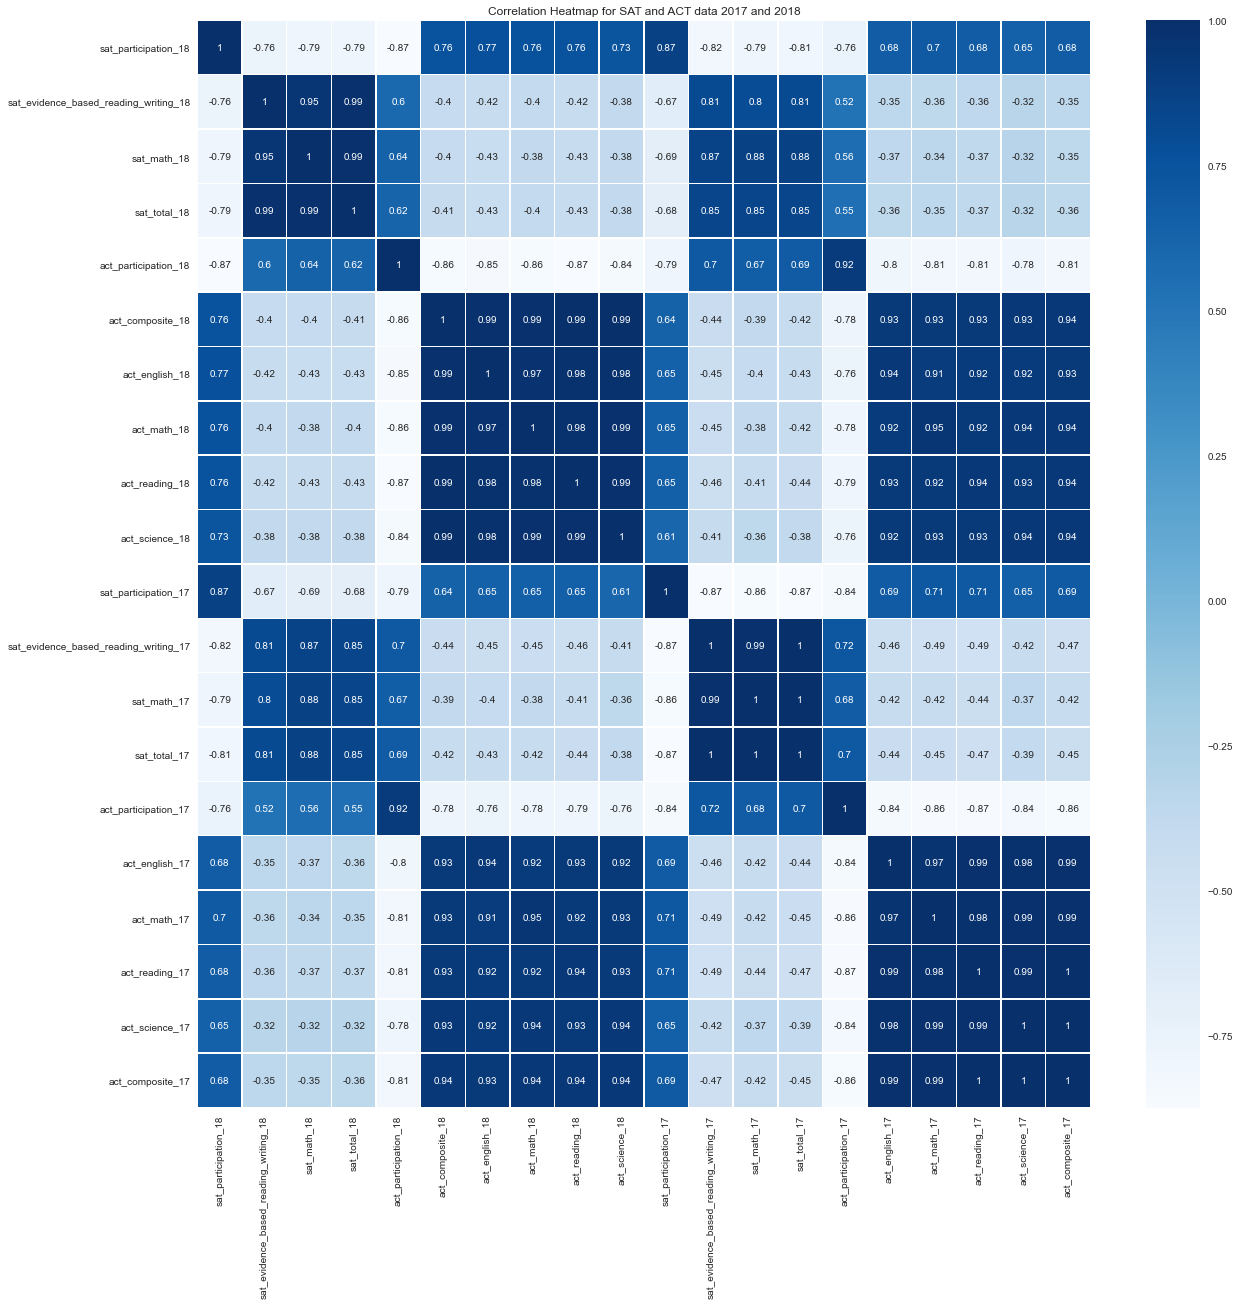

In [81]:
plt.figure(figsize=(20,20))
sns.heatmap(final.corr(), annot=True, linewidth=0.5, cmap='Blues')
plt.title("Correlation Heatmap for SAT and ACT data 2017 and 2018");

In [82]:
final.corr()

,sat_participation_18,sat_evidence_based_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18,sat_participation_17,sat_evidence_based_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
sat_participation_18,1.000000,-0.762055,-0.791338,-0.785926,-0.868103,0.756881,0.769916,0.760668,0.755345,0.730759,0.874763,-0.818925,-0.789166,-0.806796,-0.756479,0.679643,0.696294,0.680380,0.647635,0.683164
sat_evidence_based_reading_writing_18,-0.762055,1.000000,0.954661,0.988560,0.595309,-0.400289,-0.416250,-0.396155,-0.415435,-0.379754,-0.666313,0.814096,0.800380,0.810068,0.522593,-0.347978,-0.355133,-0.363354,-0.320049,-0.351602
sat_math_18,-0.791338,0.954661,1.000000,0.988622,0.635613,-0.404529,-0.429791,-0.384726,-0.427119,-0.379256,-0.686941,0.865909,0.878982,0.875601,0.555406,-0.365787,-0.340094,-0.374075,-0.315431,-0.354639
sat_total_18,-0.785926,0.988560,0.988622,1.000000,0.622634,-0.407387,-0.428198,-0.395208,-0.426412,-0.384136,-0.684556,0.849798,0.849583,0.852727,0.545179,-0.361303,-0.351847,-0.373195,-0.321679,-0.357463
act_participation_18,-0.868103,0.595309,0.635613,0.622634,1.000000,-0.858031,-0.850362,-0.856963,-0.869304,-0.843234,-0.792382,0.702481,0.667444,0.687107,0.919171,-0.796637,-0.813410,-0.813021,-0.784996,-0.808497
act_composite_18,0.756881,-0.400289,-0.404529,-0.407387,-0.858031,1.000000,0.990671,0.990874,0.992683,0.994377,0.639323,-0.440915,-0.388769,-0.415762,-0.775514,0.932535,0.933247,0.929711,0.934586,0.939271
act_english_18,0.769916,-0.416250,-0.429791,-0.428198,-0.850362,0.990671,1.000000,0.972551,0.983390,0.979142,0.645332,-0.447026,-0.403532,-0.426210,-0.763176,0.937173,0.910684,0.916256,0.915850,0.927275
act_math_18,0.760668,-0.396155,-0.384726,-0.395208,-0.856963,0.990874,0.972551,1.000000,0.979599,0.988105,0.649435,-0.450128,-0.384444,-0.418011,-0.782878,0.918868,0.948795,0.923622,0.936559,0.938748
act_reading_18,0.755345,-0.415435,-0.427119,-0.426412,-0.869304,0.992683,0.983390,0.979599,1.000000,0.988227,0.651892,-0.460779,-0.414636,-0.438811,-0.789497,0.930897,0.924997,0.937214,0.930810,0.937604
act_science_18,0.730759,-0.379754,-0.379256,-0.384136,-0.843234,0.994377,0.979142,0.988105,0.988227,1.000000,0.611675,-0.410872,-0.355104,-0.383698,-0.763334,0.922873,0.930087,0.926420,0.939334,0.935847


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [83]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10, 10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_title(list_of_titles[i])
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

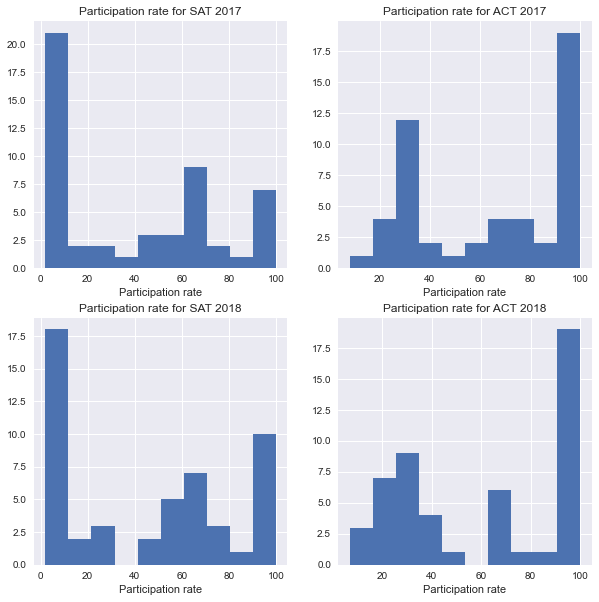

In [84]:
# Participation rates for SAT & ACT
participation_col = ['sat_participation_17', 'act_participation_17', 'sat_participation_18', 'act_participation_18']
xlabels_name = ['Participation rate', 'Participation rate', 'Participation rate', 'Participation rate']
titles_name = ['Participation rate for SAT 2017', 'Participation rate for ACT 2017', 'Participation rate for SAT 2018', 'Participation rate for ACT 2018']
subplot_histograms(final, participation_col, titles_name, xlabels_name)

ACT has high 100% participation rate 
SAT has high < 10% particpation rate
It is non-normal distribution

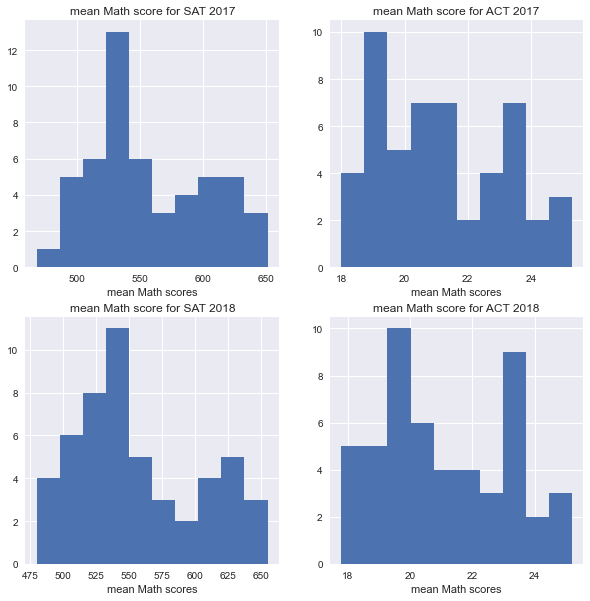

In [85]:
# Math scores for SAT & ACT
participation_col = ['sat_math_17', 'act_math_17', 'sat_math_18', 'act_math_18']
xlabels_name = ['mean Math scores', 'mean Math scores', 'mean Math scores', 'mean Math scores']
titles_name = ['mean Math score for SAT 2017', 'mean Math score for ACT 2017', 'mean Math score for SAT 2018', 'mean Math score for ACT 2018']
subplot_histograms(final, participation_col, titles_name, xlabels_name)

ACT and SAT mean math scores have histogram with similar shape. 
They were not normal distribution as 2 peaks were observed.

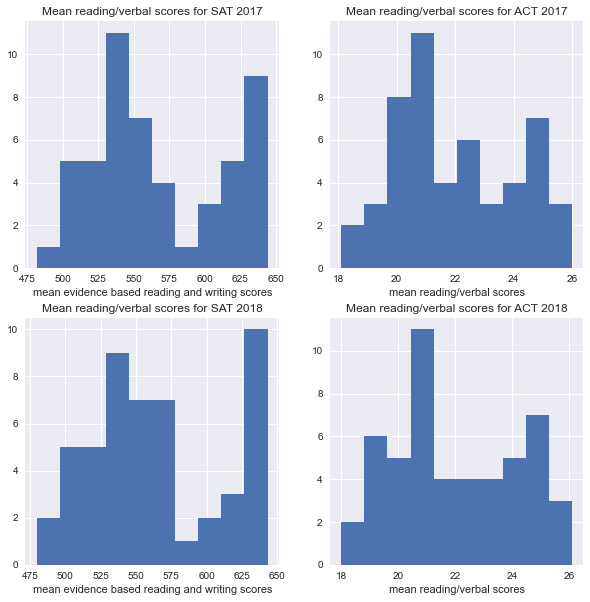

In [86]:
# Reading/verbal scores for SAT & ACT
participation_col = ['sat_evidence_based_reading_writing_17', 'act_reading_17', 'sat_evidence_based_reading_writing_18', 'act_reading_18']
xlabels_name = ['mean evidence based reading and writing scores', 'mean reading/verbal scores', 'mean evidence based reading and writing scores', 'mean reading/verbal scores']
titles_name = ['Mean reading/verbal scores for SAT 2017', 'Mean reading/verbal scores for ACT 2017', 'Mean reading/verbal scores for SAT 2018', 'Mean reading/verbal scores for ACT 2018']
subplot_histograms(final, participation_col, titles_name, xlabels_name)

ACT and SAT mean reading/verbal scores have histogram with similar shape. They were not normal distribution as 2 peaks were observed.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


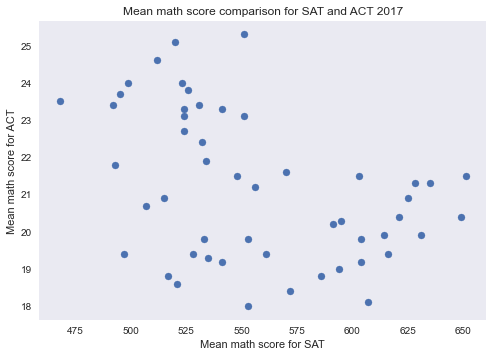

In [87]:
# SAT vs. ACT math scores for 2017

plt.scatter(final['sat_math_17'], final['act_math_17'])

# Labeling the plot and showing it
plt.xlabel('Mean math score for SAT')
plt.ylabel('Mean math score for ACT')
plt.title('Mean math score comparison for SAT and ACT 2017', fontdict=None, loc='center', pad=None)
plt.grid()
plt.show()

No co-relation for mean ACT and SAT math scores

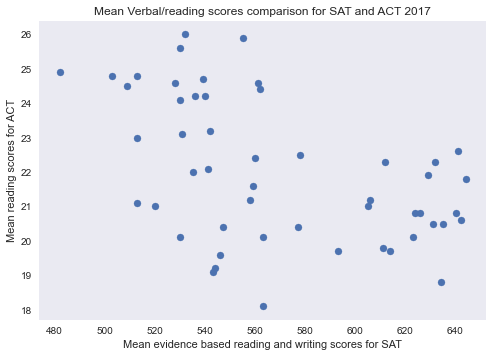

In [88]:
# SAT vs. ACT verbal/reading scores for 2017


# Labeling the plot and showing it
plt.xlabel('Mean evidence based reading and writing scores for SAT')
plt.ylabel('Mean reading scores for ACT')
plt.title('Mean Verbal/reading scores comparison for SAT and ACT 2017', fontdict=None, loc='center', pad=None)
plt.grid()
plt.show()

No co-relation for ACT and SAT mean verbal/reading scores

One of the reason could be SAT combines read and writing into 1 subject instead of separating them

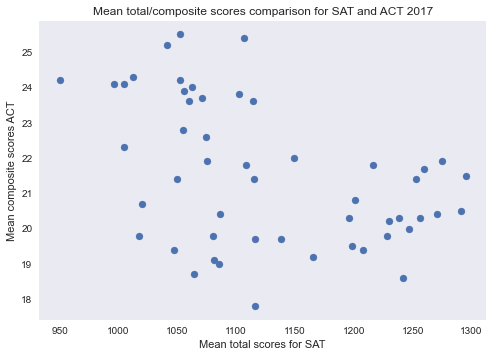

In [89]:
# SAT vs. ACT total/composite scores for 2017

plt.scatter(final['sat_total_17'], final['act_composite_17'])

# Labeling the plot and showing it
plt.xlabel('Mean total scores for SAT')
plt.ylabel('Mean composite scores ACT')
plt.title('Mean total/composite scores comparison for SAT and ACT 2017', fontdict=None, loc='center', pad=None)
plt.grid()
plt.show()

No co-relation for ACT and SAT scores

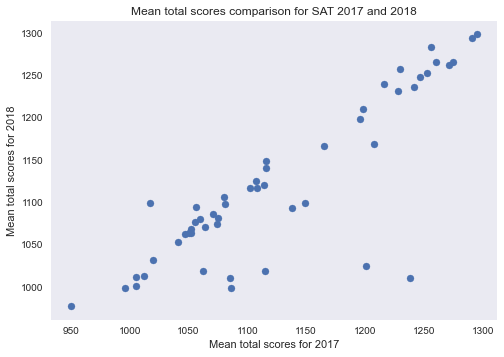

In [90]:
# Total scores for SAT 2017 vs. 2018

plt.scatter(final['sat_total_17'], final['sat_total_18'])

# Labeling the plot and showing it
plt.xlabel('Mean total scores for 2017')
plt.ylabel('Mean total scores for 2018')
plt.title('Mean total scores comparison for SAT 2017 and 2018', fontdict=None, loc='center', pad=None)
plt.grid()
plt.show()

Mean total scores for ACT 2017 and 2018 are co-related

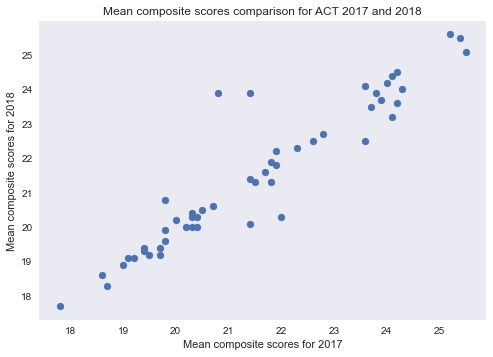

In [91]:
# Composite scores for ACT 2017 vs. 2018

plt.scatter(final['act_composite_17'], final['act_composite_18'])

# Labeling the plot and showing it
plt.xlabel('Mean composite scores for 2017')
plt.ylabel('Mean composite scores for 2018')
plt.title('Mean composite scores comparison for ACT 2017 and 2018', fontdict=None, loc='center', pad=None)
plt.grid()
plt.show()

Mean composite scores for ACT 2017 and 2018 are co-related

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [92]:
# boxplot to compare particpation
same_boxplot_participation = final.rename(columns={'sat_participation_17':'SAT 2017','sat_participation_18': 'SAT 2018', 'act_participation_17': 'ACT 2017', 'act_participation_18': 'ACT 2018'})

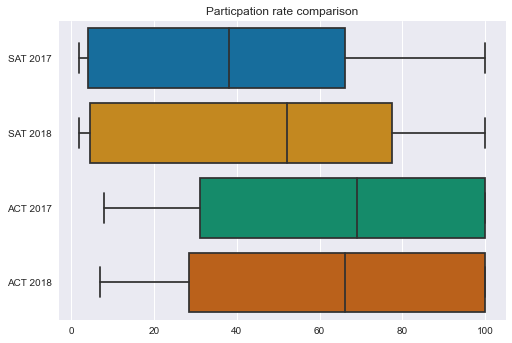

In [93]:
sns.boxplot(data=same_boxplot_participation[['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']], orient="h", palette="colorblind").set_title('Particpation rate comparison');

ACT have sigificant participation rate as compared to SAT for both years
Observed 25% improvement in participation rate for SAT from 2017 to 2018

In [94]:
# boxplot to compare ACT subjects in 2017 and 2018
same_boxplot_ACT = final.rename(columns={'act_composite_17':'Composite 2017','act_composite_18':'Composite 2018', 'act_science_17':'Science 2017','act_science_18':'Science 2018','act_reading_17':'Reading 2017', 'act_reading_18':'Reading 2018','act_math_17':'Math 2017','act_math_18':'Math 2018','act_english_17':'English 2017','act_english_18':'English 2018'})

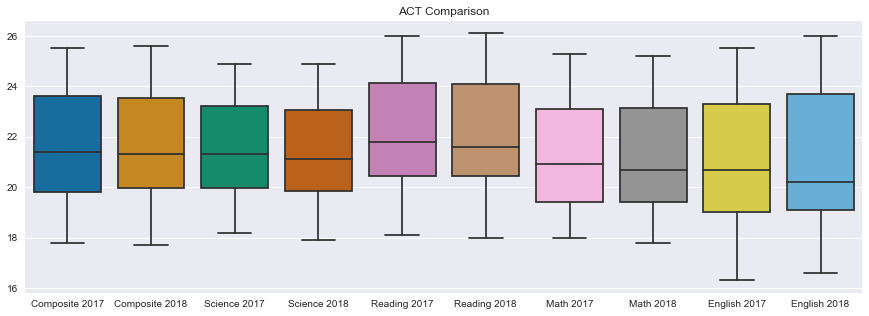

In [95]:
plt.figure(figsize=(15,5))
sns.boxplot(data=same_boxplot_ACT[['Composite 2017', 'Composite 2018', 'Science 2017', 'Science 2018', 'Reading 2017', 'Reading 2018', 'Math 2017', 'Math 2018', 'English 2017', 'English 2018']], orient="v", palette="colorblind").set_title('ACT Comparison');

Similar scores for ACT subjects. Students also score slightly higher for reading as compared to other subjects

In [96]:
# boxplot to compare Math and reasing & writing in 2017 and 2018
same_boxplot_SAT = final.rename(columns={'sat_math_17':'Math 2017','sat_math_18':'Math 2018','sat_evidence_based_reading_writing_17':'Reading and writing 2017','sat_evidence_based_reading_writing_18':'Reading and writing 2018'})

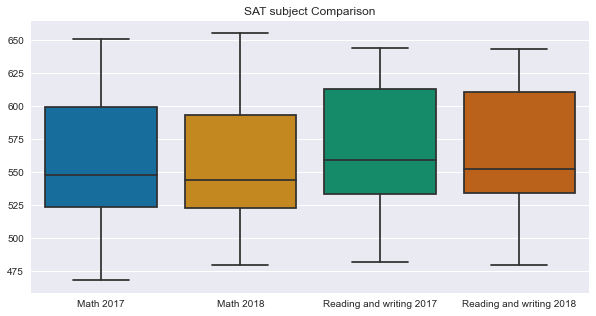

In [97]:
plt.figure(figsize=(10,5))
sns.boxplot(data=same_boxplot_SAT[['Math 2017','Math 2018','Reading and writing 2017', 'Reading and writing 2018']], orient="v", palette="colorblind").set_title('SAT subject Comparison');

Reading and writing have slightly better score than math for both years

In [98]:
# boxplot to compare SAT total scores
same_boxplot_SAT_total = final.rename(columns={'sat_total_17':'Total 2017','sat_total_18':'Total 2018'})

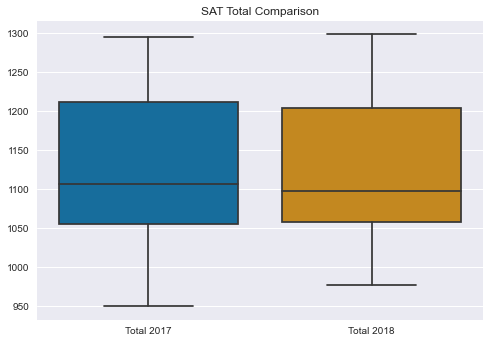

In [99]:
sns.boxplot(data=same_boxplot_SAT_total[['Total 2017','Total 2018']], orient="v", palette="colorblind").set_title('SAT Total Comparison');

SAT total is similar in year 2017 and 2018

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

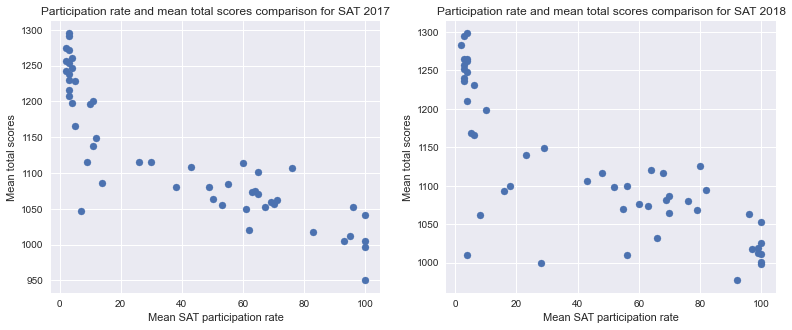

In [100]:
# total score vs paticipation rate for SAT for both years
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))


ax1.scatter(final['sat_participation_17'], final['sat_total_17'])
ax1.set_title('Participation rate and mean total scores comparison for SAT 2017')
ax1.set_xlabel('Mean SAT participation rate')
ax1.set_ylabel('Mean total scores')

ax2.scatter(final['sat_participation_18'], final['sat_total_18'])
ax2.set_title('Participation rate and mean total scores comparison for SAT 2018')
ax2.set_xlabel('Mean SAT participation rate')
ax2.set_ylabel('Mean total scores');

For both years:
- Low partcipation rate co-relates to high SAT mean total scores
- There are fewer 100% participation rates as compared to participation rate < 5%

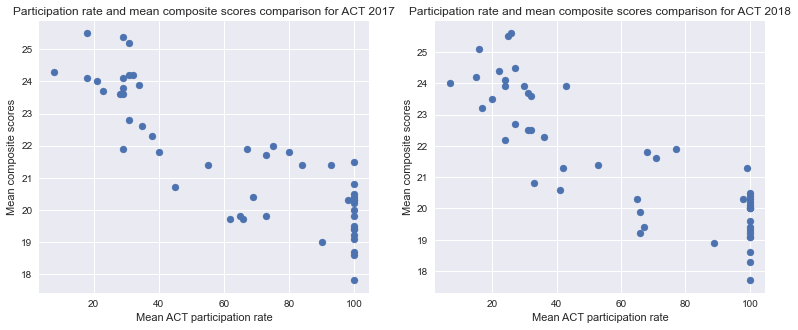

In [101]:
# total score vs paticipation rate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.scatter(final['act_participation_17'], final['act_composite_17'])
ax1.set_title('Participation rate and mean composite scores comparison for ACT 2017')
ax1.set_xlabel('Mean ACT participation rate')
ax1.set_ylabel('Mean composite scores')

ax2.scatter(final['act_participation_18'], final['act_composite_18'])
ax2.set_title('Participation rate and mean composite scores comparison for ACT 2018')
ax2.set_xlabel('Mean ACT participation rate')
ax2.set_ylabel('Mean composite scores');

For both years:
- Low partcipation rate co-relates to high ACT mean composite scores
- There are far more 100% participation rates as compared to participation rate < 5%

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [102]:
final.describe()

,sat_participation_18,sat_evidence_based_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18,sat_participation_17,sat_evidence_based_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608
std,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695
min,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


Answers: 

**central tendency**
Mode is not included in describe(). Thus, we are not able to obtain the full picture of its shape. As observed from the above histograms, most graphs have more than 1 mode. Hence, no bell shape expected to observed from this dataset. Mean != mode != median will be observed.


**shape/skewness**

mean < median (skewed left):
- ACT particpation 2018
- SAT particpation 2018

mean > median (skewed right):
- SAT evidence based reading writing for 2018
- SAT math 2018
- SAT Total 2018

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: None of the histogram for above subjects exhibit characteristics of a normal distribution.

1. Mean is not equal to median, not equal to mode.
2. None of the histograms for math, reading and rates were symmetric
3. None of the histograms has only 1 peak.

Normal distribution criteria not met for math, reading rates

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No.

1) It is not expensive or challenging to collect entire population data since the test papers were to be marked anyway.

2) It is possible for students to take both ACT and SAT test. These data points can cause repeated sampling and affect the inference results

3) Statistical inference must assume that the observations on a variable are independent one of the other. States with low population will achieve high participation rate easily.

4) Lower participation rate have a higher mean score. Bias selection - only better performing students would take the test which result in a higher average score

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No.

1) SAT and ACT math test were not exactly equivalent. 

2) Both test have different scales

3) The scatterplot for ACT Math vs SAT Math does not show any correlation. Hence, there is no relationship between the 2.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [103]:
# Code: none

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [104]:
# index to frame the 3 states chosen for SAT participation
states_3_sat = final.loc[(final['state'] == 'Colorado') | (final['state'] == 'Ohio')| (final['state'] == 'Illinois')][['state', 'sat_participation_17', 'sat_participation_18']]

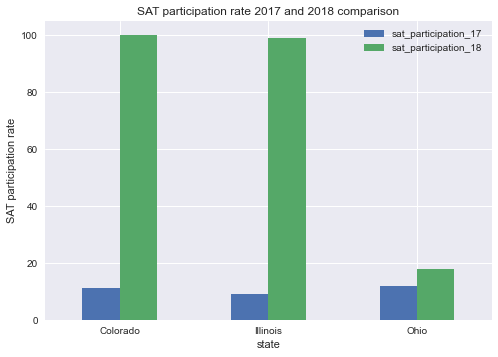

In [105]:
# plot comparison charts to show change in particpation rate for SAT both years
ax = states_3_sat.plot.bar(x='state', rot=0)
ax.set_ylabel('SAT participation rate')
ax.set_title('SAT participation rate 2017 and 2018 comparison');

Below are the factors resulting in the change in participation rate:

1) SAT School Day, a program in which students take the SAT in their own school on a weekday, rather than taking it on a Saturday in a different school than the one they attend. 2017 december, the organization also announced that schools can negotiate contracts to administer the SAT during the school day.

2) In 2017-18, 10 states (Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, West Virginia) and District of Columbia covered the cost of the SAT for all their public school students. Three years ago, only three states and the District of Columbia did so.

3) The College Board is also trying to increase SAT participation through fee waivers for low-income students, and by taking steps to identify eligible students and automatically giving them the fee waiver benefits, said Schmeiser.

4) After 15 years since 2001, ACT administered to juniors at Illinois public high schools because ACT was part of the high school Prairie State Achievement Test, and thus was free for all students. But when the new PARCC test premiered, the ACT was no longer offered for free. ACT got pushed out in a lucrative and contentious procurement process. The College Board's SAT was the winner of a multimillion-dollar contract from the state to give its exam to more than 140,000 juniors in Illinois from April, 5th 2017 onwards. Having said that, some districts are also paying to offer ACT. The reason for this is due to the commitment made by the high-schools to students on receiving ACT-forcused training in their first 2 years of high-school.


**References**

1) SAT Scores See Slight Increase as Test-Taking Surges: https://blogs.edweek.org/edweek/high_school_and_beyond/2018/10/more_than_2_million_students_take_the_sat.html

2) Illinois switching from ACT, will give students SAT instead
https://www.bnd.com/news/local/article50939170.html

3) Illinois Changed to the SAT in 2017: What You Need to Know
https://www.testive.com/illinois/

4) As state switches to SAT exam, some districts also paying to offer ACT
https://www.chicagotribune.com/news/breaking/ct-iillinois-act-exam-met-20170414-story.html

In [106]:
# index to frame the 3 states chosen for ACT aprticiaption
states_3_act = final.loc[(final['state'] == 'Colorado') | (final['state'] == 'Ohio')| (final['state'] == 'Illinois')][['state', 'act_participation_17', 'act_participation_18']]

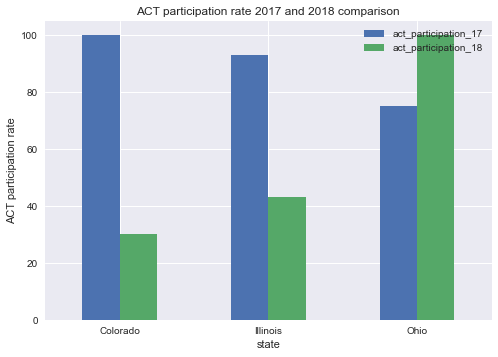

In [107]:
# plot comparison charts to show change in particpation rate for ACT both years
ax = states_3_act.plot.bar(x='state', rot=0)
ax.set_ylabel('ACT participation rate')
ax.set_title('ACT participation rate 2017 and 2018 comparison');

ACT Ohio participation rate increased because Class of 2018 was the first where the state paid for all students to take the exam. Ohio’s participation rate from 75 percent to 100 percent, but predictably dipped the state’s average composite score from 22.0 to 20.3. The dip is due to thousands of non-college-bound students who were not tested in the past were tested last year.

Colorado and Illinois observed a drop in ACT participation rate. Since SAT participation rate is 100% for 2018, those who took the test in ACT 2018 actually took both test. This is likely to be due to college requirement for ACT test taken.

**Reference** 

1) Historically low ACT scores ‘a red flag for our country:
https://www.daytondailynews.com/news/historically-low-act-scores-red-flag-for-our-country/djfx9Urp719WyEaMfykyxL/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

The below is the summary of the takeaways:

**Histogram study**
- Participation rate, mean math, reading/verbal for ACT, SAT for both years does not exhibit normal dustribution. They do not have normal distribution characteristics such as unimodal, symmetric, bell-curve(mean = median =mode).

**Scatter plot study**
- Math and reading/verbal scores for SAT is not corelated to ACT.
- SAT total score is not corelated to ACT total composite score.
- However, mean total scores for SAT and ACT can be co-related for different years. This shows the mean total scores were comparable year to year for each test.

**Boxplot study**
- SAT participation rate improved from 2017 to 2018. This is due to 11 states had they SAT test cost covered by public schools, implementation of SAT school day program. Multiple participation rate improvement resulting 25% participation rate increase in 2018.
- ACT has approximately 21% higher participation rate than SAT
- Reading is the top scoring subject for both SAT and ACT

**Scatter plot study**
- Higher participation rate was observed when the mean total/composite scores were low for both test.
- There are more 100% participation rate for ACT than SAT

**Colorado, Illinois, Ohio study**
- Colorado and Illinois had participation rate reaches 100% in 2018, 90% improvement from 2017. They are the 2 states out of 10, which state covered the cost of SAT from 2017-18.
- Opportunity arises as ACT's contract of 15 years ended. SAT won the contract to administer SAT test for 2017 onwards. However, there is still significant participation rate observed for ACT test in 2018. This is due to schools had commited ACT training/test to students previously during the first 2 years.
- Likewise, Ohio state's ACT 2018 participation rate rose due to state paid for the test. Their total composite dipped because it was the first time many students went for the test.

**Recommendation:**
- After studying the improvement of participation rates of 3 states (Colorado, Illinois and Ohio), it was observed that participation rate will increase to 100% if state covers the cost of the test and also made a test mandatory.
- From the Illionis example, window of opportunity swung open after ACT's contract ended. Hence, it is important to identify similar opportunities in oher states to replicate the Illinois's participation rate increase.
- Another suggestion will be substituting/partnering with Smarter Balanced test as many states still using PARCC and Smarter Balanced test. Examples are, California, Hawaii, Montana, Nevada, Oregon, South Dakota, Vermont, and Washington.
- With that, state to be selected to improve partipation rate will be California. Reason is:

1) No mandatory test assigned.

2) Califonia is using Smarter Balanced test which can consider for partnership

3) High population density

4) Currently low in particption rate. Hence there is room for participation improvement.

Other possible recomendations includes:
- Improving test structure to prepare students for college 
- Improve affordability by extending income eligible scheme to waive fee to low income households
- Improve accessibility by bringing test location to schools on days that are convenient to students. Also to offer testing and preparation material at a discount to the state
- Launch campaigns to promote SAT test


**Reference**

1) Why the SAT and ACT May Replace PARCC and Smarter Balanced
https://www.edsurge.com/news/2016-02-08-why-the-sat-and-act-may-replace-parcc-and-smarter-balanced

2) THE COMMON CORE #10YEARCHALLENGE: ONLY 1 STATE TO CONTINUE USING PARCC TEST
https://blog.edcite.com/2019/02/16/the-common-core-10yearchallenge-only-1-state-to-continue-using-parcc-test/#:~:text=This%20means%20in%20the%202019,own%20state%2Ddesigned%20test%20items.

3) Substituting SAT/ACT for Smarter Balanced tests is not a smart idea 
https://edsource.org/2018/substituting-sat-act-for-the-smarter-balanced-test-is-not-a-smart-idea/601775